# AirSimDataset - Resnet50 - Start - Targets from 3 RGB channels into 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary
#import torchinfo
import json
from torchvision.models.segmentation import fcn
from matplotlib import cm
import signal
import glob
from PIL import Image
import cv2

from torch.utils.tensorboard import SummaryWriter

In [2]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device("cuda:0")
print("Device chosen GPU:", torch.cuda.get_device_name(device))

# Parameters
num_classes = 3

# Hyper parameters
num_epochs = 12
batch_size = 2
learning_rate = 0.0001
beta1 = 0.9
beta2 = 0.999
log_directory = f"runs/AirSimDataset/resnet50/v0.0.0 Adam lr = {learning_rate}, epochs = {num_epochs}, batchsize ={batch_size}"
writer  = SummaryWriter(log_directory)

Device chosen GPU: NVIDIA TITAN RTX


Images  shape: (84, 720, 1280, 4)
Targets shape: (84, 720, 1280, 4)
Images cropped shape: (84, 720, 1280, 3)
Targets cropped shape: (84, 720, 1280, 3)


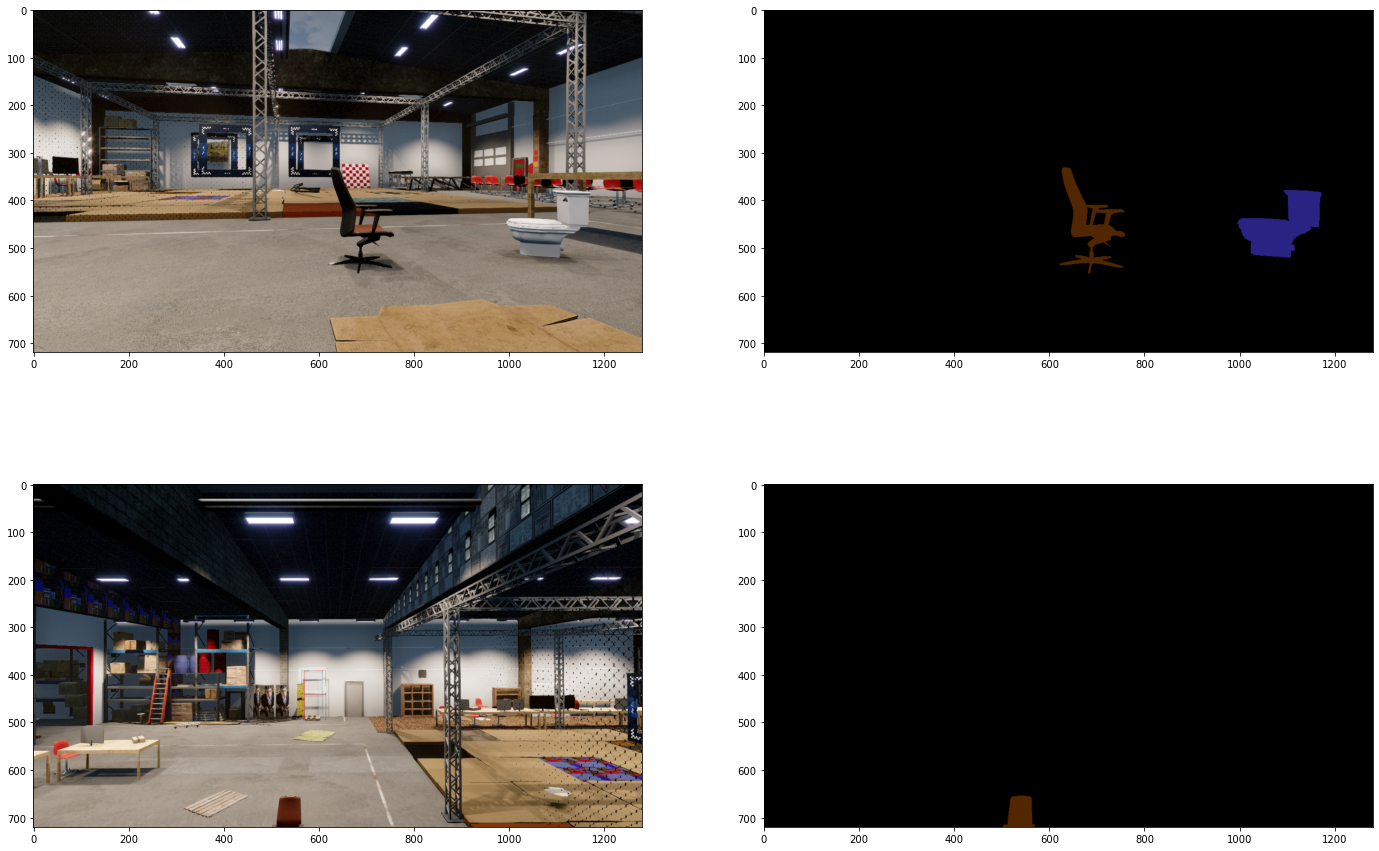

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)

def pil_to_np(img):
    return np.array(img) 

# The Cityscapes dataset is avaliable in PyTorch
# train_dataset = torchvision.datasets.Cityscapes(root='./cityscapesDataset', split='train', mode='fine', target_type='semantic', transform=transform, target_transform=pil_to_np)
# #test_dataset  = torchvision.datasets.Cityscapes(root='./cityscapesDataset', split='test',  mode='fine', target_type='semantic', transform=pil_to_tensor, target_transform=transforms.ToTensor())
# val_dataset   = torchvision.datasets.Cityscapes(root='./cityscapesDataset', split='val',   mode='fine', target_type='semantic', transform=transform, target_transform=pil_to_np)

# DATA_DIRECTORY = "AirSimDataset/"
# airSimDataset = np.load(DATA_DIRECTORY)
# print(airSimDataset)

# Help with glob from https://stackoverflow.com/questions/39195113/how-to-load-multiple-images-in-a-numpy-array
file_list_images  = sorted(glob.glob('AirSimDataset4/img_rgbd_camera_0_*.png'))
file_list_targets = sorted(glob.glob('AirSimDataset4/img_rgbd_camera_5_*.png'))

dataset_images  = np.array([np.array(Image.open(filename)) for filename in file_list_images])
dataset_targets = np.array([np.array(Image.open(filename)) for filename in file_list_targets])

print("Images  shape:", dataset_images.shape)
print("Targets shape:", dataset_targets.shape)

dataset_images_RGB = dataset_images[:,:,:,0:3]
dataset_targets_RGB = dataset_targets[:,:,:,0:3]

print("Images cropped shape:", dataset_images_RGB.shape)
print("Targets cropped shape:", dataset_targets_RGB.shape)

# Splitting the training and testing datasets into smaller batches
# workers = 5
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)#,  num_workers=workers)#, pin_memory=True))
# #test_loader  = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False)#, num_workers=workers)#, pin_memory=True))
# val_loader   = torch.utils.data.DataLoader(dataset=val_dataset,  batch_size=batch_size, shuffle=False)#, num_workers=workers)#, pin_memory=True))

#print('Train Size: ', len(train_dataset))
#print('Test Size : ', len(test_dataset))
#print('Val Size  : ', len(val_dataset))

'''Plot from dataset'''
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(24, 16))
ax[0][0].imshow(np.array(dataset_images_RGB[0])) # transpose(1,2,0) changes the order of the dimensions
ax[0][1].imshow(np.array(dataset_targets_RGB[0]))
ax[1][0].imshow(np.array(dataset_images_RGB[83])) # transpose(1,2,0) changes the order of the dimensions
ax[1][1].imshow(np.array(dataset_targets_RGB[83]))

'''Plot from dataloader''';
# plot_img, plot_target = next(iter(val_loader))
# plot_img = plot_img[0]
# plot_target = plot_target[0]
# print(plot_img.shape)
# print(plot_target.shape)

# fig, ax = plt.subplots(ncols=2, figsize=(24, 16))
# ax[0].imshow(np.array(plot_img).transpose(1,2,0)) # transpose(1,2,0) changes the order of the dimensions
# ax[1].imshow(np.array(plot_target))


In [ ]:
# Using cv2
# img_target = cv2.imread(file_list_targets[0]) # opencv uses GBR
# print(img_target.shape)
# # np.where(np.all(img_target == np.array()))
# h, w = img_target.shape[:2]
# colors=[]
# for x in range(w):
#     for y in range(h):
#         pixel = img_target[y,x]
#         if str(pixel) not in colors:
#             colors.append(str(pixel))

# print(colors) 


(720, 1280, 3)
['[0 0 0]', '[132  36  41]', '[ 0 38 81]']


In [46]:
img_target = dataset_targets_RGB[0] # opencv uses GBR
img_target_RGB = img_target
print(img_target.shape)
# np.where(np.all(img_target == np.array()))
h, w = img_target_RGB.shape[:2]
colors=[]
for x in range(w):
    for y in range(h):
        pixel = img_target[y,x]
        if str(pixel) not in colors:
            colors.append(str(pixel))

print(colors) 

(720, 1280, 3)
['[0 0 0]', '[81 38  0]', '[ 41  36 132]']


In [75]:
#np.where([np.all(img_target_RGB == np.array([0, 0, 0])), np.all(img_target_RGB == np.array([81, 38, 0])), np.all(img_target_RGB == np.array([41, 36, 132]))], [0, 1, 2])
np.where((dataset_targets_RGB == np.array([81, 38, 0])))


(array([ 0,  0,  0, ..., 83, 83, 83]),
 array([  0,   0,   0, ..., 719, 719, 719]),
 array([   0,    1,    2, ..., 1277, 1278, 1279]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [70]:
np.all(img_target_RGB[0] == np.array([0, 0, 0]))

np.where([[True, False]],
         [[1], [0]], [[3], [4]])

array([[1, 3],
       [0, 4]])

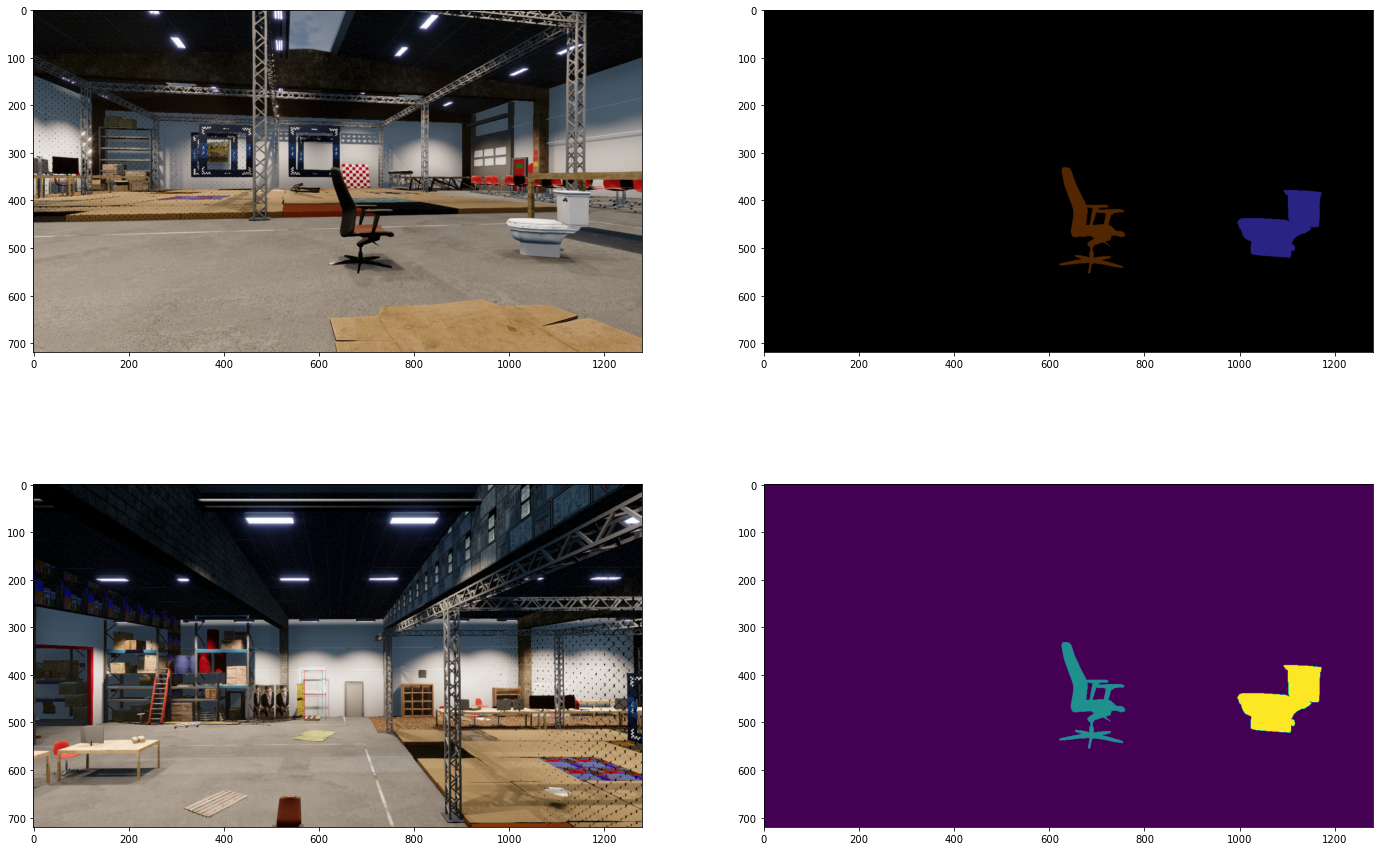

In [5]:
# Single image label 0-2
new_targets = np.zeros(dataset_targets_RGB.shape[1:3])

img_target = dataset_targets_RGB[0] # opencv uses GBR
img_target_RGB = img_target
h, w = img_target_RGB.shape[:2]
for x in range(w):
    for y in range(h):
        pixel = img_target[y,x]
        if np.all(pixel == np.array([0, 0, 0])):
            new_targets[y,x] = 0
        elif np.all(pixel == np.array([81, 38,0])):
            new_targets[y,x] = 1
        elif np.all((pixel == np.array([41, 36, 132]))):
            new_targets[y,x] = 2

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(24, 16))
ax[0][0].imshow(np.array(dataset_images_RGB[0])) # transpose(1,2,0) changes the order of the dimensions
ax[0][1].imshow(np.array(dataset_targets_RGB[0]))
ax[1][0].imshow(np.array(dataset_images_RGB[83])) # transpose(1,2,0) changes the order of the dimensions
ax[1][1].imshow(np.array(new_targets))

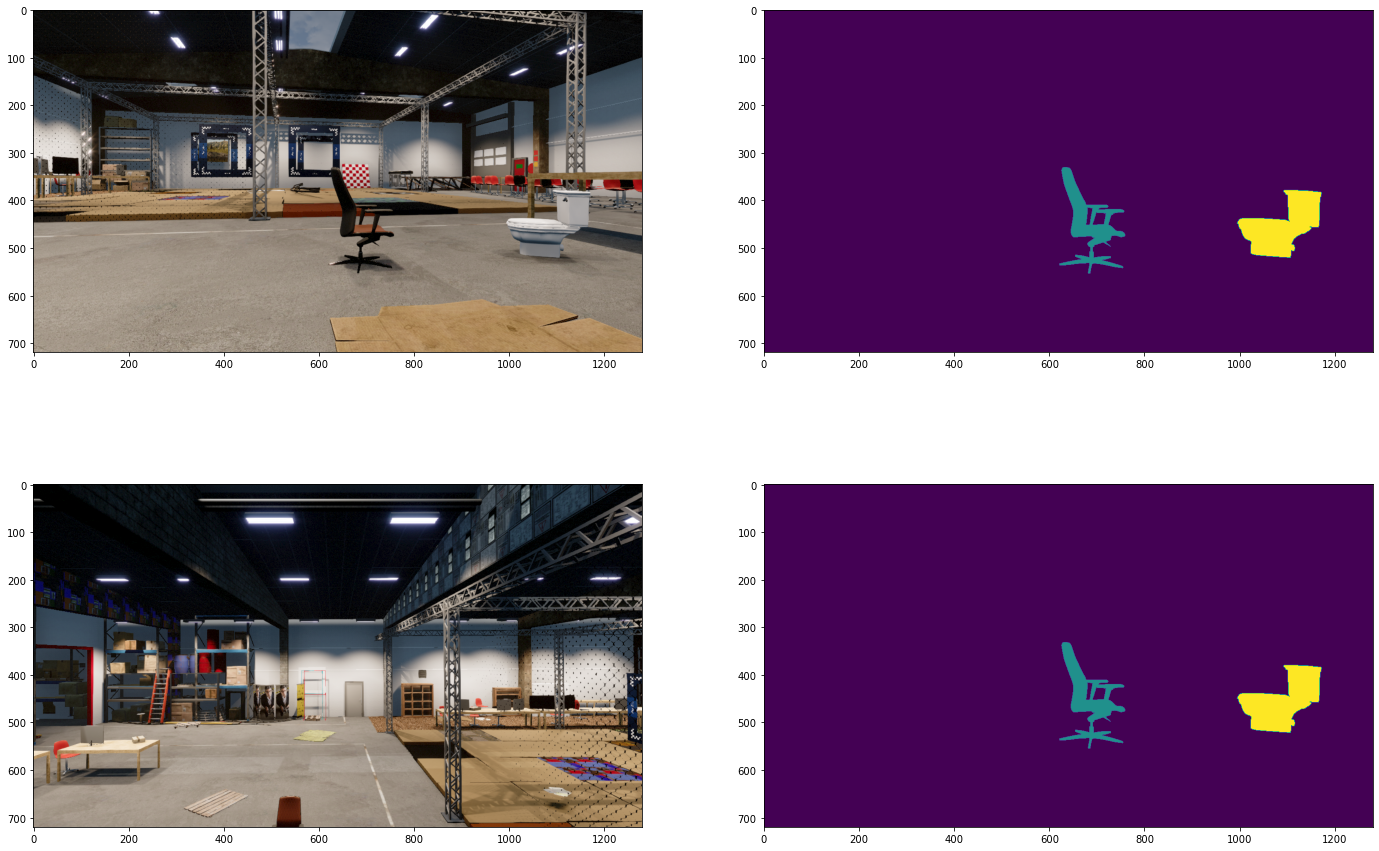

In [7]:
# Single image label 0-2
img_target_label = np.zeros(dataset_targets_RGB.shape[0:3])

img, h, w = img_target_label.shape[:3]
for i in range(img):
    for x in range(w):
        for y in range(h):
            pixel = img_target_label[i,y,x]
            if np.all(pixel == np.array([0, 0, 0])):
                img_target_label[i,y,x] = 0
            elif np.all(pixel == np.array([81, 38,0])):
                img_target_label[i,y,x] = 1
            elif np.all((pixel == np.array([41, 36, 132]))):
                img_target_label[i,y,x] = 2

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(24, 16))
ax[0][0].imshow(np.array(dataset_images_RGB[0])) # transpose(1,2,0) changes the order of the dimensions
ax[0][1].imshow(np.array(img_target_label[0]))
ax[1][0].imshow(np.array(dataset_images_RGB[83])) # transpose(1,2,0) changes the order of the dimensions
ax[1][1].imshow(np.array(img_target_label[83]))

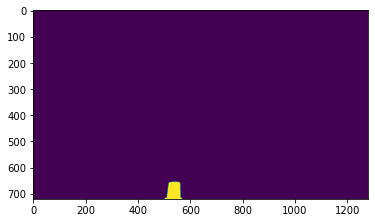

In [23]:
img_target_label = np.zeros(dataset_targets_RGB.shape[0:3])
target = dataset_targets_RGB

new_target = np.zeros(target.shape[:3])

class_colors = [
    #np.array([0, 0,0]),    # new_targets are already zero
    np.array([81, 38, 0]),  # Toilet
    np.array([41, 36, 132]) # Chair
]

for i, class_color in enumerate(class_colors):                  # For every class/colour 
    indice = np.where(np.all(target == class_color, axis=-1))   # Where the current RGB value corresponds with hte pixel in the last axis
    new_target[indice] = i+1        # Use that pixel index to define class number from enumerate. The +1 is due to 0 being background



In [4]:
'''Loading saved model''';
model = fcn.fcn_resnet50(pretrained=False, progress=True, num_classes=num_classes, aux_loss=False, pretrained_backbone=True).to(device)
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=[beta1, beta2], eps=1e-08)

loaded_checkpoint = torch.load("checkpoint_resnet50_0.5epoch_cityscapes.pth")

# for param in model.parameters():    # Freezing the startign layers
#     # param.requires_grad = False
#     param.requires_grad = False

model.load_state_dict(loaded_checkpoint["model_state"])
optimiser.load_state_dict(loaded_checkpoint["optimiser_state"])
epoch = loaded_checkpoint["epoch"]
criterion = nn.CrossEntropyLoss()

In [4]:
'''Loading new model''';
model = fcn.fcn_resnet50(pretrained=False, progress=True, num_classes=num_classes, aux_loss=False, pretrained_backbone=True).to(device)

# Finetuning
# for param in model.parameters():    # Freezing/unfreezing the starting layers
#     # param.requires_grad = False
#     param.requires_grad = False

optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=[beta1, beta2], eps=1e-8)
criterion = nn.CrossEntropyLoss()


Train Size:  2975
Val Size  :  500


In [ ]:
'''Training'''
# Tensorboard
#writer.add_graph(model.cpu(), val_dataset[0][0])
#writer.close()

# Doing the training now

n_total_steps = len(train_loader)

steps_until_print = batch_size

# stop_training = False
# def signal_handler(sig, frame):
#     print('\nDetected Ctrl+C, stopping training')
#     stop_training = True
#     print('Saving model')
# signal.signal(signal.SIGINT, signal_handler)

model.train()
print('Starting training')
for epoch in range(num_epochs):
    #if stop_training: break

    # Check for stop - read file for boolean to stopping safely
    with open("train.json") as train_json:
        train_dict = json.load(train_json)
        if train_dict["train"] == "False": break

    testing_batches = iter(val_loader) # Every epoch tests the whole dataset once

    for i, (images, targets) in enumerate(train_loader):
            # Check for stop - read file for boolean to stopping safely
        with open("train.json") as train_json:
            train_dict = json.load(train_json)
            if train_dict["train"] == "False": break

        images = images.to(device)
        targets = targets.to(device)
        # print('images  shape:', images.shape)
        # print('targets shape:', targets.shape)

        # Forward pass
        outputs = model(images)['out']
        # print("outputs shape:", outputs.shape)
      
        loss = criterion(outputs, targets.long())

        # Backward pass
        optimiser.zero_grad()   # Clear old gradient values
        loss.backward()         # Calculate the gradients
        optimiser.step()        # Update the model's weights - seen at model.parameters()

        with torch.no_grad():

            # Logging the train accuracy
            pred = torch.argmax(outputs, dim=1)     # Evaluate along the 1st dimension
            batch_pixel_accuracy = (pred == targets).sum().item()/(batch_size*pred.shape[1]*pred.shape[2])
            writer.add_scalar('Accuracy/training', batch_pixel_accuracy, epoch * n_total_steps + i) # label of the scalar, actual loss mean, current global step 

            # Logging the train loss
            writer.add_scalar('Loss/training', loss.item()/steps_until_print, epoch * n_total_steps + i) # label of the scalar, actual loss mean, current global step

            # For every 5 batches, test one batch. (test:train data ratio is split 1:5)
            if (i+1) % 5 == 0:  # Logging the testing loss
                test_images, test_targets = testing_batches.next()
                
                test_images = test_images.to(device)
                test_targets = test_targets.to(device).squeeze(1)

                model.eval()
                test_outputs = model(test_images)['out']
                model.train()
                    
                test_pred = torch.argmax(test_outputs, dim=1)

                '''Plot test results'''
                # fig, ax = plt.subplots(ncols=3, figsize=(24, 16))
                # ax[0].imshow(test_images[0].to('cpu').squeeze().permute(1,2,0))  # .squeeze() does the same thing as .numpy().transpose(1,2,0) 
                # ax[1].imshow(test_targets[0].to('cpu').squeeze()) # .squeeze() does the same thing as .numpy().transpose(1,2,0) 
                # ax[2].imshow(test_pred[0].cpu().detach())
                # plt.pause(0.01)
                '''                     '''

                # print('test_images  shape:', test_images.shape)
                # print('test_targets shape:', test_targets.shape)
                # print('test_outputs shape:', test_outputs.shape)
                # print('test_pred    shape:', test_pred.shape)

                # writer.add_images('test/images',      test_images                  , epoch * n_total_steps + i)
                # writer.add_images('test/targets',     test_targets.unsqueeze(dim=1), epoch * n_total_steps + i)
                # writer.add_images('test/predictions', test_pred.unsqueeze(dim=1)   , epoch * n_total_steps + i)

                # Logging the test accuracy
                test_batch_pixel_accuracy = (test_pred == test_targets).sum().item()/(batch_size*test_pred.shape[1]*test_pred.shape[2])
                #print('Test batch pixel accuracy', test_batch_pixel_accuracy)
                writer.add_scalar('Accuracy/testing', test_batch_pixel_accuracy, epoch * n_total_steps + i) # label of the scalar, actual loss mean, current global step 

                # Logging the test loss
                test_loss = criterion(test_outputs, test_targets.long())
                writer.add_scalar('Loss/testing', test_loss.item()/len(test_targets), epoch * n_total_steps + i) # label of the scalar, actual loss mean, current global step

                #writer.add_scalars("Accuracy", {"train": batch_pixel_accuracy, "test": test_batch_pixel_accuracy}, epoch * n_total_steps + i)

                print(f'Epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.5f}')
                

    #print(f'Epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.5f}')

print("Training is done")


In [6]:
'''Saving the model''';
# checkpoint = {
#     "epoch": epoch,
#     "model_state": model.state_dict(),
#     "optimiser_state": optimiser.state_dict()
# }
# torch.save(checkpoint, "checkpoint_resnet50_0.5epoch_v2_cityscapes.pth")

In [ ]:
'''Plotting''';
with torch.no_grad():
    iterator = iter(val_loader)
    images, targets = next(iterator)
    images = images.to(device)

    model.eval().to(device)
    output = model(images.to(device))['out']
    pred = torch.argmax(output, dim=1)

    images = images.to('cpu')
    targets = targets.to('cpu')
    output = output.to('cpu')
    pred = pred.to('cpu')
    print('image: ', images.shape)
    print('target:', targets.shape)
    print('output:', output.shape)
    print('pred:  ', pred.shape)
    fig, ax = plt.subplots(ncols=3, figsize=(24, 16))
    ax[0].imshow(images[1].squeeze().permute(1,2,0))  # .squeeze() does the same thing as .numpy().transpose(1,2,0) 
    ax[1].imshow(targets[1].squeeze()) # .squeeze() does the same thing as .numpy().transpose(1,2,0) 
    ax[2].imshow(pred[1].squeeze())